### Computational Methods (16:540:540) - Spring 2021
#### Homework 6 – Python Coding

1. Generate 100 random samples from multivariate normal distribution where 𝑝 = 5. Then, calculate means and covariance matrix.

2. Assign the output $y=5 x_{1}+9 x_{2}+2 x_{3}^{2}$

3. Perform Regression using the dataset generated above to predict 𝑦 using the following algorithms from Scikit-learn:

        a) Support vector regression

        b) Decision Tree

        c) Artificial Neural Network

Report the MSE and R-squared error. Use 70% of the dataset for training and 30% for testing.

In [1]:
# 1.Generate 100 random samples from multivariate normal distribution where 𝑝 = 5. Then, calculate means and covariance matrix.

In [2]:
import numpy as np
import pandas as pd
from numpy.random import default_rng
rng = default_rng(5)
p, n=5, 100

In [3]:
# multivariate normal distribution
mu = np.random.uniform(-10,10,size=p)
C = np.random.random((p,p))
cov = C @ C.T # positive semi-definite
x_1 = rng.multivariate_normal(mu, cov, n)

In [4]:
x1_mean = np.mean(x_1)
x1_var = np.var(x_1)

In [5]:
print(f'From univariate normal distribution,the mean of 100 random the samples is {round(x1_mean,4)},the variance is {round(x1_var,4)}')

From univariate normal distribution,the mean of 100 random the samples is -3.9128,the variance is 16.1878


In [6]:
# 2. Assign the output:

$y=5 x_{1}+9 x_{2}+2 x_{3}^{2}$

In [7]:
rng = default_rng(5)
y = 5 * x_1[:,0]+ 9*x_1[:,1] + (2 * x_1[:,2])**2 + rng.normal(0,1,n)

In [8]:
# 3.Perform Regression using the dataset generated above to predict 𝑦 using the following algorithms from Scikit-learn.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=123)

In [11]:
# a) Support vector regression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt


In [12]:
svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e4)
svr_poly = SVR(kernel='poly', C=1e4, degree=2)

y_rbf = svr_rbf.fit(x_train, y_train).predict(x_test)
y_lin = svr_lin.fit(x_train, y_train).predict(x_test)
y_poly = svr_poly.fit(x_train, y_train).predict(x_test)

In [13]:
print("R2 score in rbf kernel :", r2_score(y_test, y_rbf),"MSE :",mean_squared_error(y_test, y_rbf))
print("R2 score in linear kernel :", r2_score(y_test, y_lin))
print("R2 score in polynomial kernel :", r2_score(y_test, y_poly))

R2 score in rbf kernel : 0.9816804371274229 MSE : 12.636138229890694
R2 score in linear kernel : 0.920242919803626
R2 score in polynomial kernel : 0.9976057619871586


In [14]:
print("With rbf kernel, Mean squared error: %.2f"% mean_squared_error(y_test, y_rbf),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_rbf))
print("With linear kernel, Mean squared error: %.2f"% mean_squared_error(y_test, y_lin),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_lin))
print("With polynomial kernel, Mean squared error: %.2f"% mean_squared_error(y_test, y_poly),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_poly))

With rbf kernel, Mean squared error: 12.64 ,the Variance score: 0.98(best fit = 1)
With linear kernel, Mean squared error: 55.01 ,the Variance score: 0.92(best fit = 1)
With polynomial kernel, Mean squared error: 1.65 ,the Variance score: 1.00(best fit = 1)


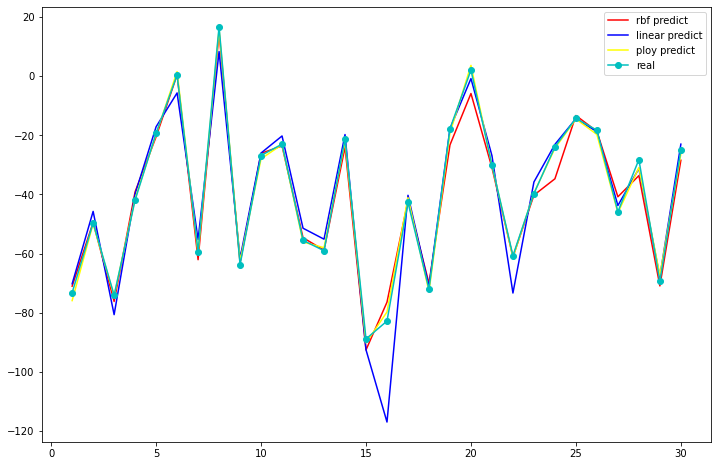

In [15]:
plt.figure(figsize=(12,8))

x_s = np.arange(1,len(x_test) + 1)

plt.plot(x_s, y_rbf,color='red', label="rbf predict")
plt.plot(x_s, y_lin, color='blue',label="linear predict")
plt.plot(x_s, y_poly,color='yellow',label="ploy predict")
plt.plot(x_s, y_test, 'co-', label="real")
plt.legend()

In [104]:
# b) decision trees
# b-1 Decision Tree in Regression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [105]:
regr = DecisionTreeRegressor()
regr.fit(x_train, y_train)

DecisionTreeRegressor()

In [106]:
y_pred = regr.predict(x_test)

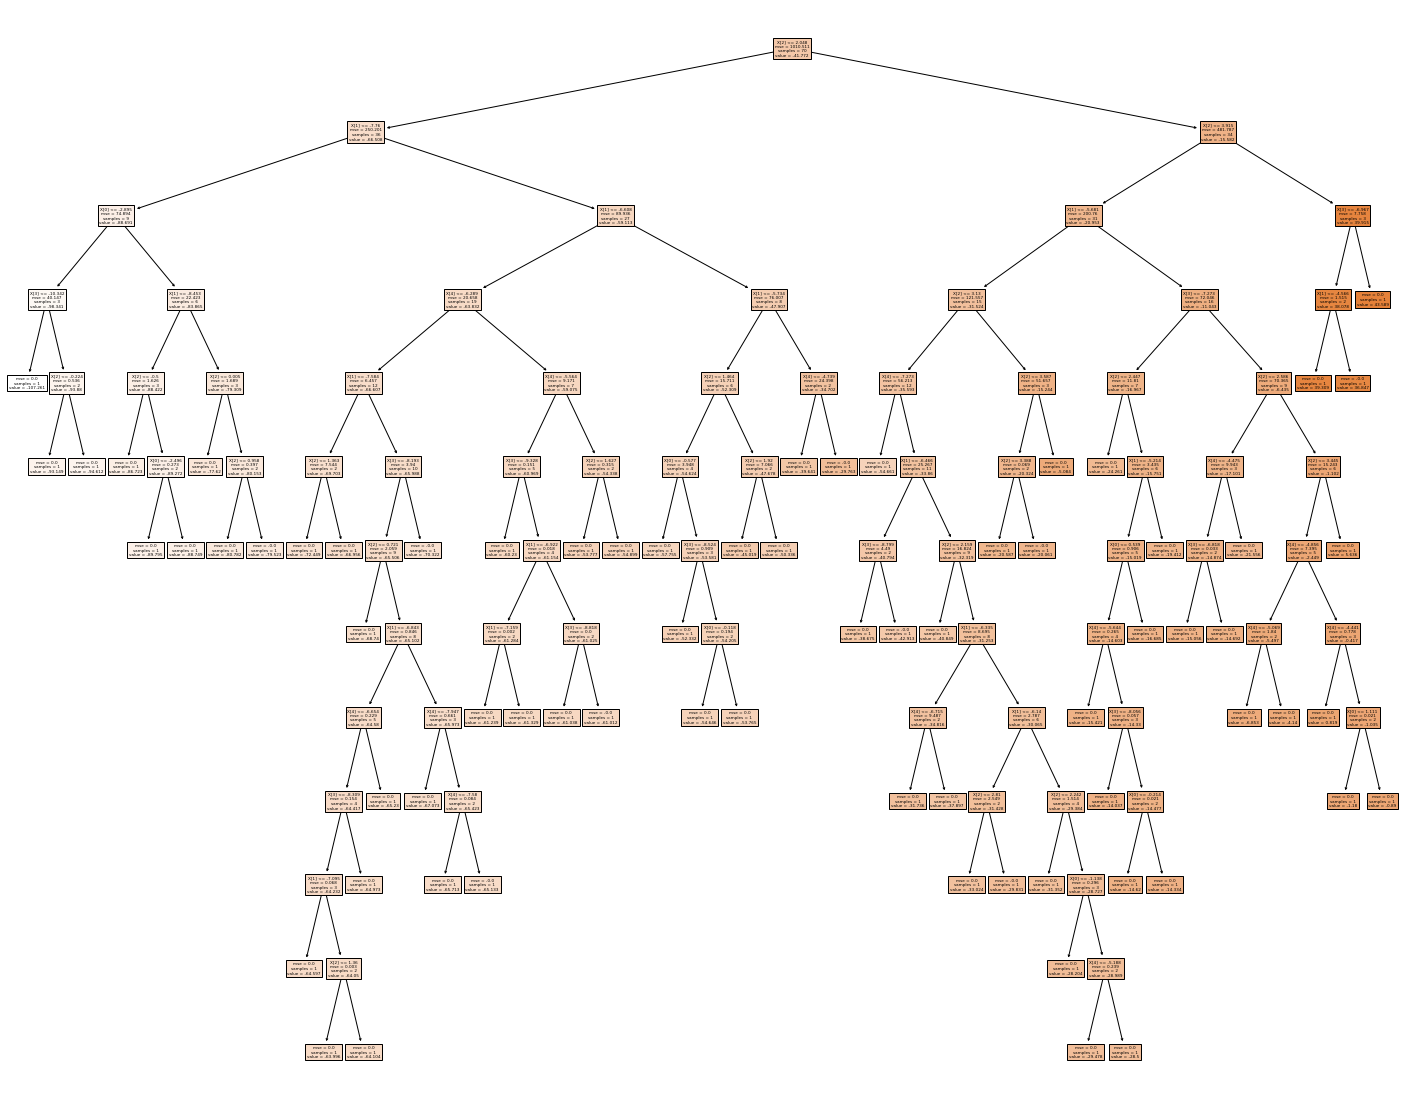

In [107]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, filled=True)

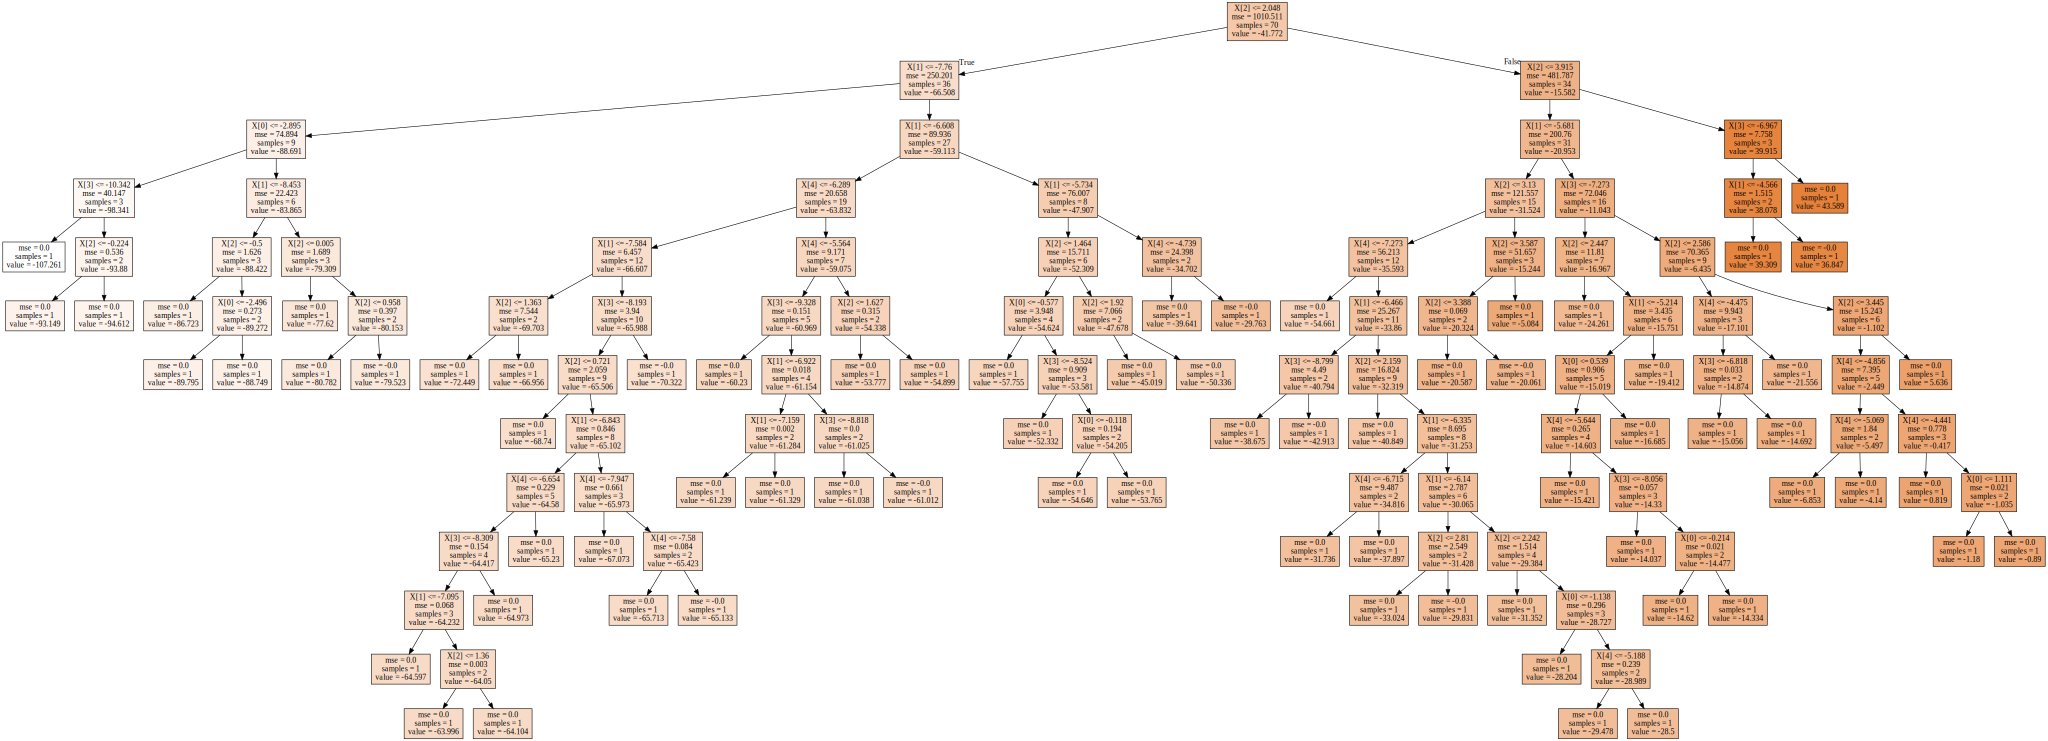

In [108]:
dot_data_regr = tree.export_graphviz(regr, out_file=None, 
                                filled=True)
graphviz.Source(dot_data_regr, format="png") 

In [109]:
# df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
# df

Text(0, 0.5, 'Predicted')

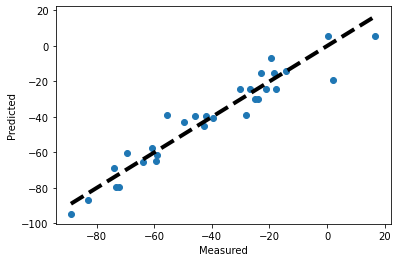

In [110]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

In [111]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_pred))

Mean Absolute Error: 6.192817232118795
Mean Squared Error: 59.34114750143893
Root Mean Squared Error: 7.7033205503496305
Variance score: 0.91(best fit = 1)


In [112]:
# Decision Tree on Classification
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(x_train, y_train.astype('int'))

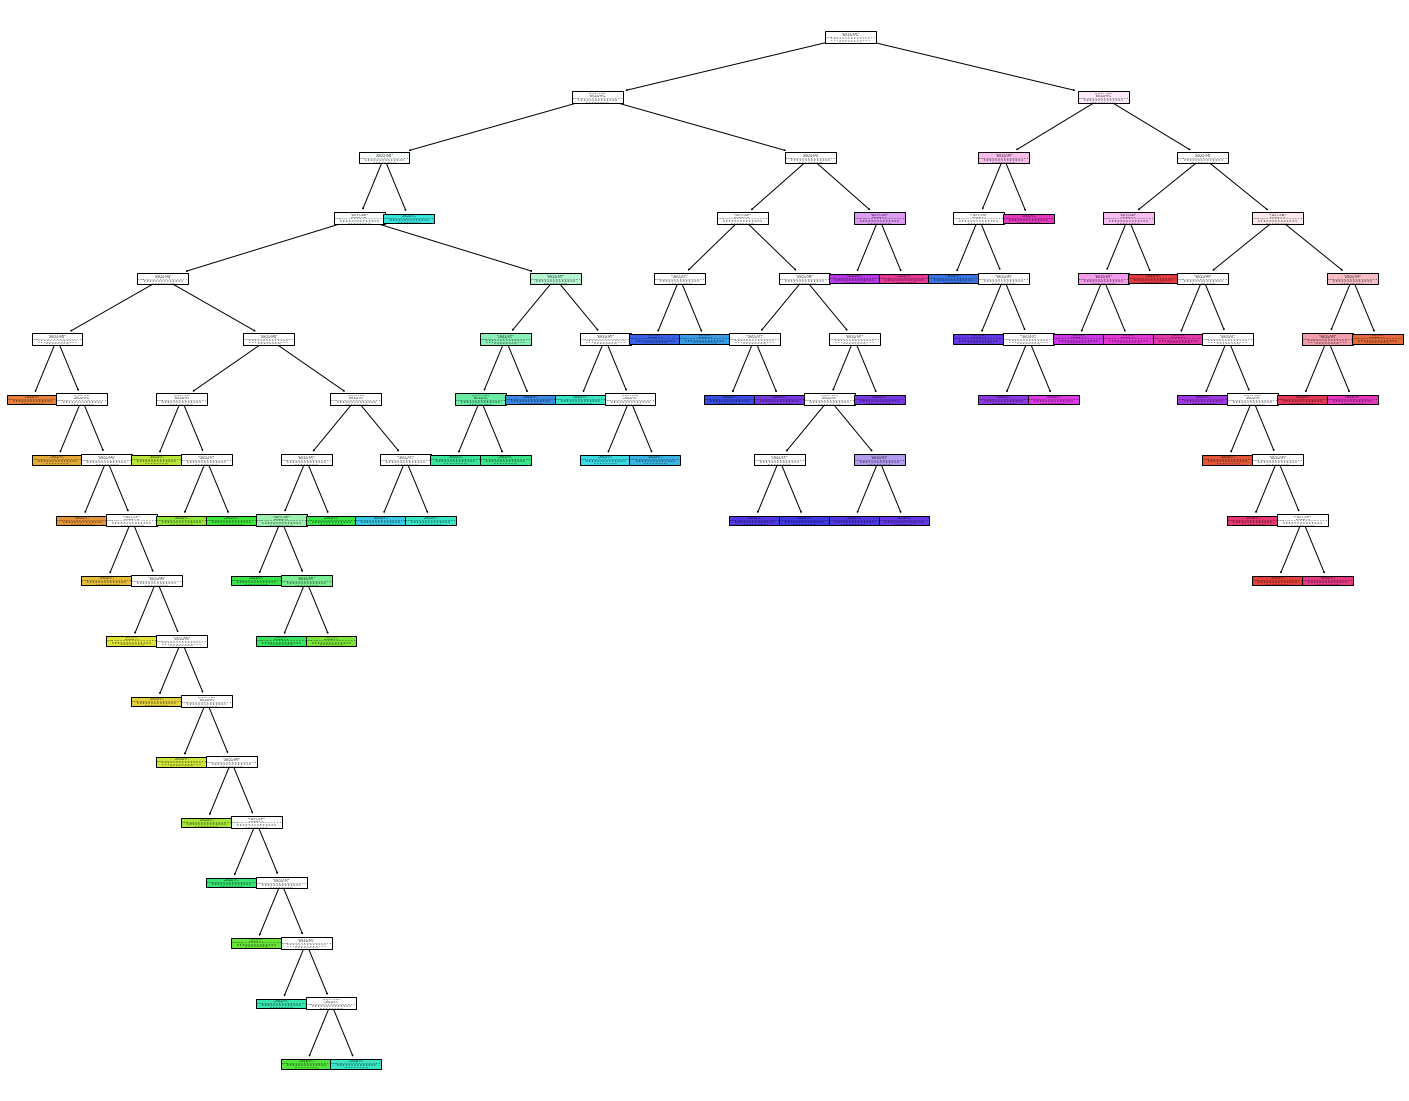

In [113]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, filled=True)

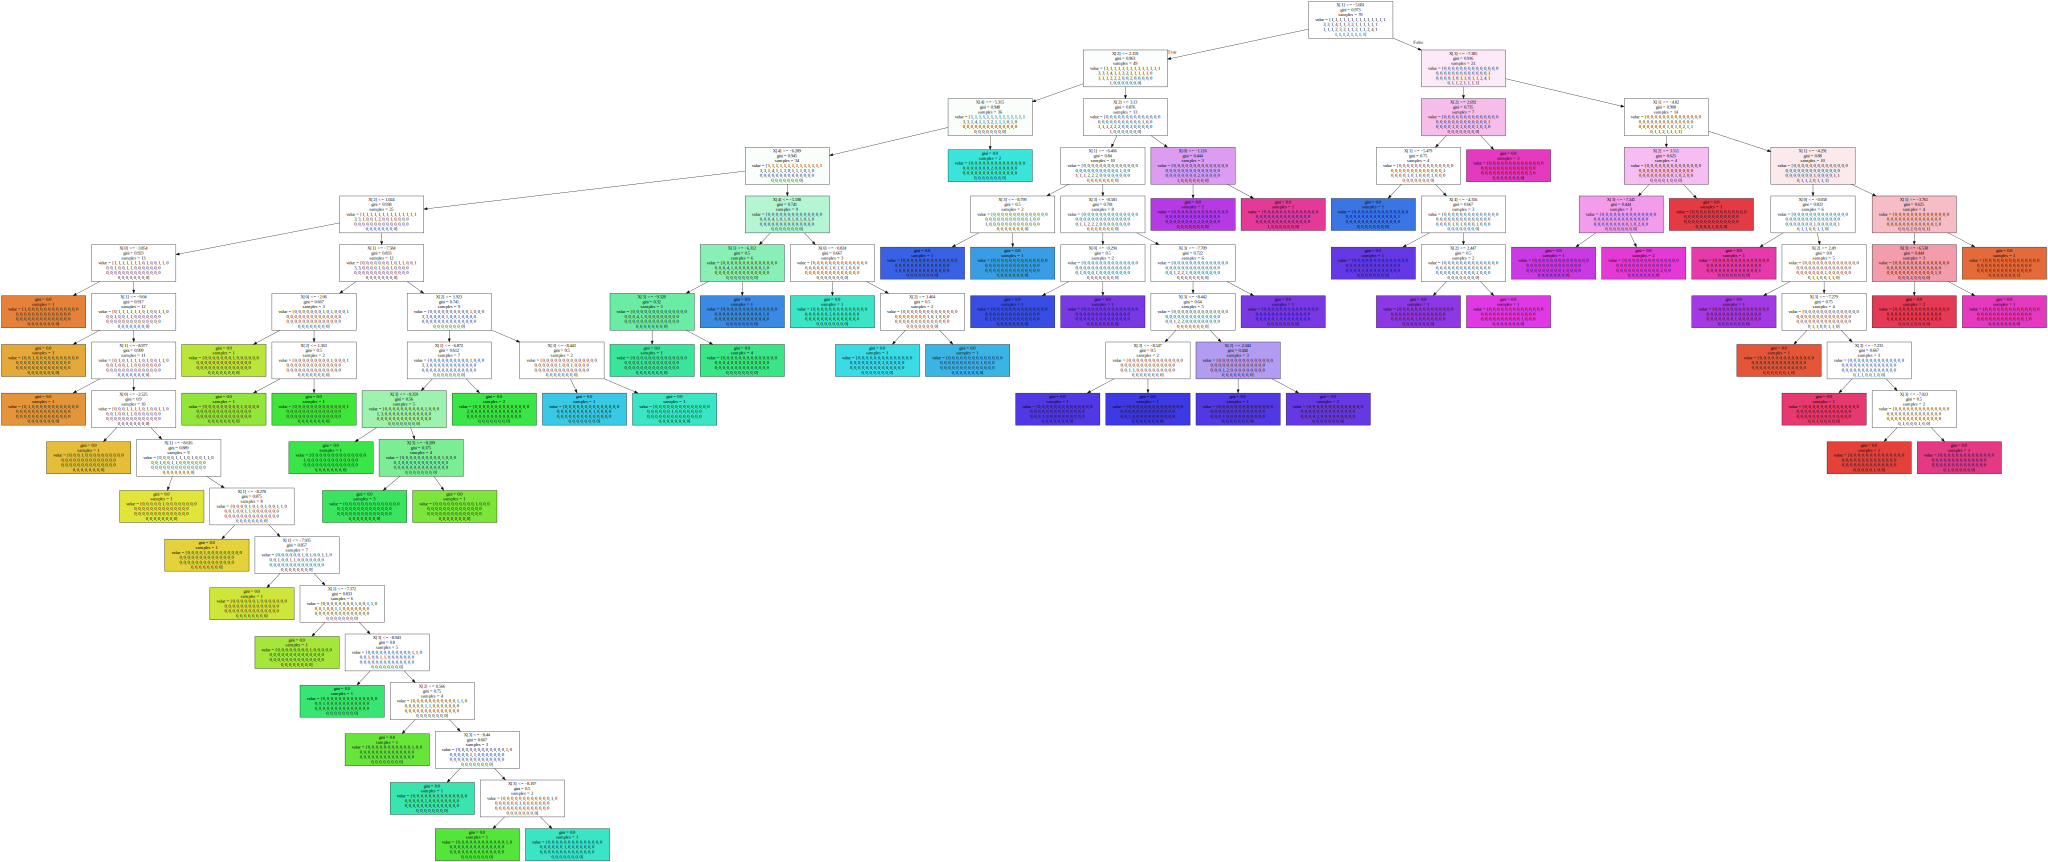

In [114]:
import graphviz
# DOT data
dot_data_clf = tree.export_graphviz(clf, out_file=None, 
                                filled=True)
# Draw graph
graph = graphviz.Source(dot_data_clf, format="png") 
graph

In [ ]:
# c) Artificial Neural Network

